In [ ]:
!git clone https://github.com/jkirkby3/fypy.git

Cloning into 'fypy'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 523 (delta 1), reused 2 (delta 0), pack-reused 514
Receiving objects: 100% (523/523), 92.12 KiB | 1.18 MiB/s, done.
Resolving deltas: 100% (313/313), done.


In [ ]:
!unzip fypy.zip

In [ ]:
!pip install py_lets_be_rational

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24470 sha256=8644b1c3e976dacfa8cef8315eba8e025529e8fbcf63a765b569d1be58647ede
  Stored in directory: /root/.cache/pip/wheels/e6/67/1e/93e41aebf34e4fd3cb02a865e9c782c9edaac5051f15a01d2e
Successfully built py_lets_be_rational


/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \


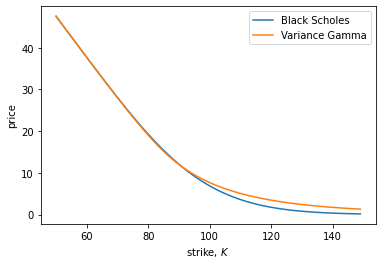

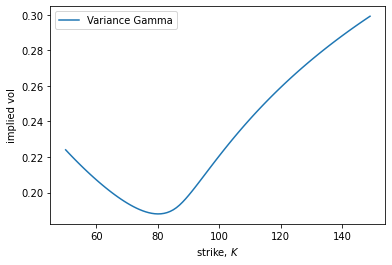

In [ ]:
"""
This example shows how to price using a Fourier pricing method (PROJ)
We include two examples:  1) Black Scholes 2) Variance Gamma
"""
from fypy.pricing.fourier.ProjEuropeanPricer import ProjEuropeanPricer
from fypy.model.levy.BlackScholes import *
from fypy.model.levy.VarianceGamma import *
from fypy.termstructures.DiscountCurve import DiscountCurve_ConstRate
from fypy.termstructures.EquityForward import EquityForward
from fypy.model.levy.BlackScholes import *
from fypy.volatility.implied.ImpliedVolCalculator import ImpliedVolCalculator_Black76
import matplotlib.pyplot as plt
import numpy as np

# ============================
# Set Common Parameters
# ============================
S0 = 100  # Initial stock price
r = 0.01  # Interest rate
q = 0.03  # Dividend yield
T = 1  # Time to maturity of option

# ============================
# Set Term Structures
# ============================
disc_curve = DiscountCurve_ConstRate(rate=r)
div_disc = DiscountCurve_ConstRate(rate=q)
fwd = EquityForward(S0=S0, discount=disc_curve, divDiscount=div_disc)

# ============================
# Create Black-Scholes Model
# ============================
model = BlackScholes(sigma=0.2, forwardCurve=fwd, discountCurve=fwd.discountCurve)
pricer = ProjEuropeanPricer(model=model, N=2 ** 10)

# Price a set of strikes
strikes = np.arange(50, 150, 1)
prices = pricer.price_strikes(T=T, K=strikes, is_calls=np.ones(len(strikes), dtype=bool))

# Plot
plt.plot(strikes, prices, label='Black Scholes')

# ============================
# Create Variance Gamma Model
# ============================
model = VarianceGamma(sigma=0.2, theta=0.1, nu=0.8, forwardCurve=fwd, discountCurve=fwd.discountCurve)
pricer = ProjEuropeanPricer(model=model, N=2 ** 10)

# Price a set of strikes
strikes = np.arange(50, 150, 1)
is_calls = np.ones(len(strikes), dtype=bool)
prices = pricer.price_strikes(T=T, K=strikes, is_calls=is_calls)

# Plot
plt.plot(strikes, prices, label='Variance Gamma')
plt.legend()
plt.xlabel(r'strike, $K$')
plt.ylabel('price')
plt.show()

# Compute Implied Volatilities
ivc = ImpliedVolCalculator_Black76(disc_curve=disc_curve, fwd_curve=fwd)
vols = ivc.imply_vols(strikes=strikes, prices=prices, is_calls=is_calls, ttm=T)

# Plot Implied Vols
plt.plot(strikes, vols, label='Variance Gamma')
plt.legend()
plt.xlabel(r'strike, $K$')
plt.ylabel('implied vol')
plt.show()

/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \
/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encount

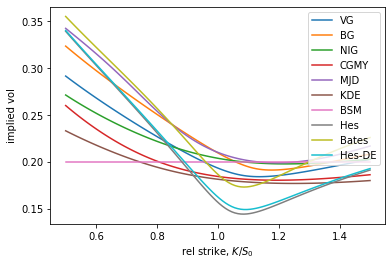

In [ ]:
"""
This example shows how to compare implied volatility smiles for multiple models
"""
from fypy.pricing.fourier.ProjEuropeanPricer import ProjEuropeanPricer
from fypy.model.levy.BlackScholes import *
from fypy.termstructures.DiscountCurve import DiscountCurve_ConstRate
from fypy.volatility.implied.ImpliedVolCalculator import ImpliedVolCalculator_Black76
from fypy.model.levy import *
from fypy.model.sv.Heston import Heston
from fypy.model.sv.Bates import Bates
from fypy.model.sv.HestonDEJumps import HestonDEJumps
import matplotlib.pyplot as plt

# ============================
# Set Common Parameters
# ============================
S0 = 100  # Initial stock price
r = 0.0  # Interest rate
q = 0.0  # Dividend yield
T = 1  # Time to maturity of option

# ============================
# Set Term Structures
# ============================
disc_curve = DiscountCurve_ConstRate(rate=r)
div_disc = DiscountCurve_ConstRate(rate=q)
fwd = EquityForward(S0=S0, discount=disc_curve, divDiscount=div_disc)

models = {
    'VG': VarianceGamma(sigma=0.2, theta=-0.1, nu=0.6, forwardCurve=fwd, discountCurve=disc_curve),
    'BG': BilateralGamma(alpha_p=1.18, lambda_p=10.57, alhpa_m=1.44, lambda_m=5.57, forwardCurve=fwd,
                         discountCurve=disc_curve),
    'NIG': NIG(alpha=10, beta=-3, delta=0.4, forwardCurve=fwd, discountCurve=disc_curve),
    'CGMY': CMGY(C=0.05, G=4, M=10, Y=1.3, forwardCurve=fwd, discountCurve=disc_curve),
    'MJD': MertonJD(sigma=0.15, lam=0.3, muj=-0.2, sigj=0.3, forwardCurve=fwd, discountCurve=disc_curve),
    'KDE': KouJD(sigma=0.14, lam=2., p_up=0.3, eta1=20, eta2=15, forwardCurve=fwd, discountCurve=disc_curve),
    'BSM': BlackScholes(sigma=0.2, forwardCurve=fwd, discountCurve=fwd.discountCurve),
    'Hes': Heston(v_0=0.04, theta=0.04, kappa=0.1, sigma_v=0.5, rho=-0.5, forwardCurve=fwd, discountCurve=disc_curve),
    'Bates': Bates(v_0=0.04, theta=0.04, kappa=0.1, sigma_v=0.5, rho=-0.5, lam=0.15, muj=-0.1, sigj=0.3,
                   forwardCurve=fwd, discountCurve=disc_curve),
    'Hes-DE': HestonDEJumps(v_0=0.04, theta=0.04, kappa=0.1, sigma_v=0.5, rho=-0.5,
                            lam=0.2, p_up=0.3, eta1=20, eta2=15, forwardCurve=fwd, discountCurve=disc_curve),
}

# Create Implied Vol calculator
ivc = ImpliedVolCalculator_Black76(disc_curve=disc_curve, fwd_curve=fwd)

# Create the pricers and attach to each model
pricers = {model_name: ProjEuropeanPricer(model=model, N=2 ** 12, L=10) for model_name, model in models.items()}
for model_name in ('Hes', 'Bates'):
    pricers[model_name] = ProjEuropeanPricer(model=models[model_name], N=2 ** 12, L=17)  # Heston requies large L param

# Set the strike Range
strikes = np.linspace(50, 150, 100)
is_calls = np.zeros(len(strikes), dtype=bool)
rel_strikes = strikes / S0

# Compute Implied vols for each model and price
for model_name, pricer in pricers.items():
    prices = pricer.price_strikes(T=T, K=strikes, is_calls=is_calls)
    vols = ivc.imply_vols(strikes=strikes, prices=prices, is_calls=is_calls, ttm=T)

    plt.plot(rel_strikes, vols, label=model_name)

    plt.legend()
    plt.xlabel(r'rel strike, $K/S_0$')
    plt.ylabel('implied vol')

plt.show()

/content/fypy/pricing/fourier/ProjEuropeanPricer.py:214: RuntimeWarning: invalid value encountered in true_divide
  * (np.sin(w / (2 * a)) / w) ** 4 \


[ 2.62870081e-09 -1.25940236e-09  8.11832823e-11]


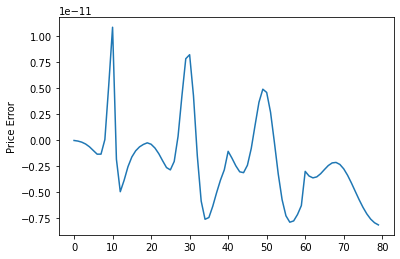

In [ ]:
"""
This example shows how to calibrate a Levy model or Heston's stochastic volatility model (choose your favorite below).
We do the following:
    1) Create a synthetic market surface, priced using Variance Gamma with set of "true" parameters
    2) Create a calibrator and set the market prices as targets
    3) Calibrate the chosen model, starting from some initial guess
    4) Show that the calibration "discovers" the true market parameters
"""
import numpy as np
from fypy.pricing.fourier.ProjEuropeanPricer import ProjEuropeanPricer
from fypy.model.levy import *
from fypy.model.sv.Heston import Heston
from fypy.termstructures.EquityForward import EquityForward
from fypy.termstructures.DiscountCurve import DiscountCurve_ConstRate
from fypy.market.MarketSurface import MarketSlice, MarketSurface
from fypy.fit.Targets import Targets
from fypy.fit.Calibrator import Calibrator, LeastSquares
import matplotlib.pyplot as plt

# ============================
# Set Common Parameters
# ============================
S0 = 100  # Initial stock price
r = 0.01  # Interest rate
q = 0.03  # Dividend yield

# ============================
# Set Term Structures
# ============================
disc_curve = DiscountCurve_ConstRate(rate=r)
div_disc = DiscountCurve_ConstRate(rate=q)
fwd = EquityForward(S0=S0, discount=disc_curve, divDiscount=div_disc)

# ============================
# Create Model (to generate a synthetic market to fit to)
# ============================
model_name = 'NIG'  # Choose this name, then override params if desired

models = {
    'VG': VarianceGamma(sigma=0.2, theta=-0.1, nu=0.6, forwardCurve=fwd, discountCurve=disc_curve),
    'BG': BilateralGamma(alpha_p=1.18, lambda_p=10.57, alhpa_m=1.44, lambda_m=5.57, forwardCurve=fwd,
                         discountCurve=disc_curve),
    'NIG': NIG(alpha=10, beta=-3, delta=0.4, forwardCurve=fwd, discountCurve=disc_curve),
    'CGMY': CMGY(C=0.05, G=4, M=10, Y=1.3, forwardCurve=fwd, discountCurve=disc_curve),
    'MJD': MertonJD(sigma=0.15, lam=0.3, muj=-0.2, sigj=0.3, forwardCurve=fwd, discountCurve=disc_curve),
    'KDE': KouJD(sigma=0.14, lam=2., p_up=0.3, eta1=20, eta2=15, forwardCurve=fwd, discountCurve=disc_curve),
    'BSM': BlackScholes(sigma=0.2, forwardCurve=fwd, discountCurve=disc_curve),
    'Hes': Heston(v_0=0.04, theta=0.04, kappa=0.1, sigma_v=0.5, rho=-0.5, forwardCurve=fwd, discountCurve=disc_curve)
}

# Create the pricers and attach to each model
model = models.get(model_name)

true_params = model.get_params()
pricer = ProjEuropeanPricer(model=model, N=2 ** 11, L=16 if model_name == 'Hes' else 12)

# Initialize market surface, fill it in with slices
surface = MarketSurface()

ttms = [0.1, 0.5, 1., 3.]  # tenors in surface
strikes = np.arange(50, 150, 5)  # same strikes for each tenor, for simplicity
is_calls = np.ones(len(strikes), dtype=bool)

target_prices = []

for ttm in ttms:
    prices = pricer.price_strikes(T=ttm, K=strikes, is_calls=is_calls)
    market_slice = MarketSlice(T=ttm, F=fwd(ttm), disc=div_disc(ttm), strikes=strikes,
                               is_calls=is_calls, mid_prices=prices)
    # Add the slice to surface
    surface.add_slice(ttm, market_slice)

    # push back the target prices to fit to
    target_prices.append(prices)

# Full set of market target prices
target_prices = np.concatenate(target_prices)


def targets_pricer() -> np.ndarray:
    # Function used to evaluate the model prices for each target
    all_prices = []
    for ttm, market_slice in surface.slices.items():
        prices = pricer.price_strikes(T=ttm, K=market_slice.strikes, is_calls=market_slice.is_calls)
        all_prices.append(prices)
    return np.concatenate(all_prices)


# Create the calibrator for the model
calibrator = Calibrator(model=model, minimizer=LeastSquares())

# Targets for the calibrator
targets = Targets(target_prices, targets_pricer)
calibrator.add_objective("Targets", targets)

# Calibrate the model
result = calibrator.calibrate()

# Compare the calibrated parameters to the "true" parameters, used to create the synthetic market
calibrated_params = model.get_params()
param_diff = calibrated_params - true_params
print(param_diff)

# Plot the errors from the targets
model.set_params(result.params)

plt.plot(targets.value())
plt.ylabel('Price Error')
plt.show()

# Another solution

In [ ]:
import numpy as np
from scipy import special
from scipy.integrate import quad
from scipy import optimize

def pdf_one_point(x=0.0, c=0.0, sigma=1.0, theta=0.0, nu=1.0):
	''' VarGamma probability density function in a point x '''
	temp1 = 2.0 / ( sigma*(2.0*np.pi)**0.5*nu**(1/nu)*special.gamma(1/nu) )
	temp2 = ((2*sigma**2/nu+theta**2)**0.5)**(0.5-1/nu)
	temp3 = np.exp(theta*(x-c)/sigma**2) * abs(x-c)**(1/nu - 0.5)
	temp4 = special.kv(1/nu - 0.5, abs(x-c)*(2*sigma**2/nu+theta**2)**0.5/sigma**2)
	return temp1*temp2*temp3*temp4

def pdf(x=0.0, c=0.0, sigma=1.0, theta=0.0, nu=1.0):
	''' VarGamma probability density function of an array or a point x '''
	if isinstance(x, (int, float, np.double)): # works with lists and arrays
		return pdf_one_point(x, c, sigma, theta, nu)
	else:
		return [pdf_one_point(xi, c, sigma, theta, nu) for xi in x]

def cdf_one_point(x=0.0, c=0.0, sigma=1.0, theta=0.0, nu=1.0):
	''' VarGamma cumulative distribution function in a point x '''
	return quad(lambda x: pdf_one_point(x, c, sigma, theta, nu), -500, x, epsabs=1e-3)[0] # todo: analytical solution?

def cdf(x=0.0, c=0.0, sigma=1.0, theta=0.0, nu=1.0):
	''' VarGamma cumulative distribution function of an array or a point x '''
	if isinstance(x, (int, float, np.double)):
		return cdf_one_point(x, c, sigma, theta, nu)
	else:
		return [cdf_one_point(xi, c, sigma, theta, nu) for xi in x]

def rnd(n=1, c=0.0, sigma=1.0, theta=0.0, nu=1.0):
	''' generates n random points from VarGamma distribution '''
	# build grid
	eps = 10e-7
	range_left = range_right = 1
	while pdf(c-range_left, c, sigma, theta, nu) > eps:
		range_left *= 2
	while pdf(c+range_right, c, sigma, theta, nu) > eps:
		range_right *= 2
	step = (range_right + range_left) / 1000.0 # todo: change to adaptive?
	grid = np.arange(c-range_left, c+range_right, step)
	pdf_values = pdf(grid, c, sigma, theta, nu)
	cdf_values = pdf_values
	for i in range(1, len(cdf_values)):
		cdf_values[i] += cdf_values[i-1]
	cdf_values /= max(cdf_values)
	# select the number which probability is close to r01
	r01 = np.random.rand(n) # random values from [0, 1]
	r = np.random.rand(n)
	for k in range(n):
		i = 1
		while cdf_values[i] < r01[k]:
			i += 1
		r[k] = grid[i-1] + (grid[i] - grid[i-1]) * np.random.rand()
	if n == 1:
		return r[0]
	else:
		return list(r)
	
def fit_moments(x):
	''' fits the parameters of VarGamma distribution to a given list of points
		via method of moments, assumes that theta is small (so theta^2 = 0)
		see: Seneta, E. (2004). Fitting the variance-gamma model to financial data. '''
	mu = np.mean(x)
	sigma_squared = np.mean( (x-mu)**2 )
	beta = np.mean( (x-mu)**3 ) / np.mean( (x-mu)**2 )**1.5
	kapa = np.mean( (x-mu)**4 ) / np.mean( (x-mu)**2 )**2
	# solve combined equations
	sigma = sigma_squared**0.5
	nu = kapa/3.0 - 1.0
	theta = sigma*beta / (3.0*nu)
	c = mu - theta
	return (c, sigma, theta, nu)

def neg_log_likelihood(data, par):
	''' negative log likelihood function for VarGamma distribution '''
	# par = array([c, sigma, theta, nu])
	if (par[1] > 0) & (par[3] > 0):
		return -sum(np.log( pdf(data, c=par[0], sigma=par[1], theta=par[2], nu = par[3]) ))
	else:
		return np.Inf

def fit_ml(data):
	''' fits the parameters of VarGamma distribution to a given list of points
		via Maximizing the Likelihood functional (=minimizing negative log likelihood)
		the initial point is chosen with fit_moments(x),
		optimization is performed using Nedler-Mead method '''
	par_init = np.array( fit_moments(data) )
	par = optimize.fmin(lambda x: neg_log_likelihood(data, x), par_init, maxiter=100)
	return tuple(par)

def fit(data):
	''' is equivalent to fit_ml '''
	return fit_ml(data)

true parameters:
0.0 1.0 0.4 0.8
parameters estimated by Methods of Moments:
0.4103540087587223 1.103063078232393 -0.11704094496469467 0.8394419506314679
parameters estimated by Maximum Likelihood:
0.08438406311745311 1.102741082663373 0.20509894300697462 0.984026609667777


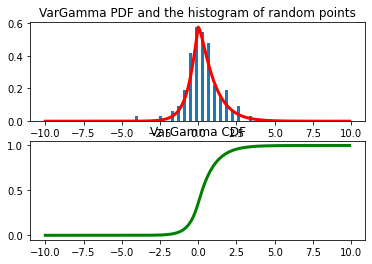

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(1)

c = 0.0     # location
sigma = 1.0 # spread
theta = 0.4 # asymmetry
nu = 0.8    # shape

grid = np.arange(-10, 10, 0.1)
pdf_values = pdf(grid, c, sigma, theta, nu)
cdf_values = cdf(grid, c, sigma, theta, nu)
data = rnd(100, c, sigma, theta, nu)

# try fitting parameters
print('true parameters:')
print(c, sigma, theta, nu)
print('parameters estimated by Methods of Moments:')
(c_fit, sigma_fit, theta_fit, nu_fit) = fit_moments(data)
print(c_fit, sigma_fit, theta_fit, nu_fit)
print('parameters estimated by Maximum Likelihood:')
(c_fit, sigma_fit, theta_fit, nu_fit) = fit(data)
print(c_fit, sigma_fit, theta_fit, nu_fit)

# prepare plotting tools
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# plot histogram of random data
hist,bins = np.histogram(data, bins=20)
hist = np.double(hist)
hist *= max(pdf_values) / max(hist) # just normalisation
width = 0.5*(bins[1] - bins[0])
center = (bins[:-1]+bins[1:]) / 2
ax1.bar(center, hist, align='center', width=width)

# plot pdf of the distribution
ax1.plot(grid, pdf_values, linewidth=3, color='r')

# plot cdf of the distribution
ax2.plot(grid, cdf_values, linewidth=3, color='g')

ax1.set_title('VarGamma PDF and the histogram of random points')
ax2.set_title('VarGamma CDF')
plt.show()

bullshit - нет прайсинга, тут вся работа именно с распределением

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import datetime, date
import pickle

with open("/content/drive/MyDrive/Colab Notebooks/sabr/msft_calls.pickle", 'rb') as msft_file:
  msft_calls = pickle.load(msft_file)
with open("/content/drive/MyDrive/Colab Notebooks/sabr/msft_puts.pickle", 'rb') as msft_file:
  msft_puts = pickle.load(msft_file)
with open("/content/drive/MyDrive/Colab Notebooks/sabr/expirations.pickle", 'rb') as msft_file:
  expirations = pickle.load(msft_file)

msft_stock_price = 294.3900146484375
day = '2022-03-16'
maturities = []
for expiration in expirations:
  maturities.append((datetime.strptime(expiration, '%Y-%m-%d') 
                    - datetime.strptime(day, '%Y-%m-%d') if day 
                     else datetime.today()).days / 256 )
maturities = np.array(maturities)

In [ ]:
msft_calls[0]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT220318C00080000,2022-03-16 18:56:33+00:00,80.0,209.15,212.35,216.35,6.299988,3.105737,41.0,2,8.390630,True,REGULAR,USD
1,MSFT220318C00085000,2022-03-16 19:47:44+00:00,85.0,206.80,207.05,210.80,12.300003,6.323909,1.0,6,7.537110,True,REGULAR,USD
2,MSFT220318C00090000,2022-03-16 13:34:39+00:00,90.0,200.20,202.00,205.90,6.949997,3.596376,1.0,24,7.299806,True,REGULAR,USD
3,MSFT220318C00095000,2022-02-15 20:48:51+00:00,95.0,204.35,197.00,200.00,0.000000,0.000000,6.0,0,6.007815,True,REGULAR,USD
4,MSFT220318C00100000,2022-03-07 18:52:08+00:00,100.0,183.40,192.00,195.35,0.000000,0.000000,1.0,19,6.179690,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,MSFT220318C00460000,2022-02-14 16:01:24+00:00,460.0,0.01,0.00,0.05,0.000000,0.000000,500.0,839,1.671877,False,REGULAR,USD
93,MSFT220318C00470000,2022-01-26 19:12:26+00:00,470.0,0.03,0.00,0.10,0.000000,0.000000,60.0,471,1.851563,False,REGULAR,USD
94,MSFT220318C00480000,2022-01-31 15:04:29+00:00,480.0,0.08,0.00,0.12,0.000000,0.000000,15.0,756,1.960938,False,REGULAR,USD
95,MSFT220318C00490000,2022-02-03 20:35:28+00:00,490.0,0.01,0.00,0.01,0.000000,0.000000,100.0,566,1.656252,False,REGULAR,USD
